In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image



Bad key "text.kerning_factor" on line 4 in
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import numpy as np
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets 
from sklearn.naive_bayes import GaussianNB 
import xgboost as xgb 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC 
import sklearn
from multi_imbalance.resampling.mdo import MDO 
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve,recall_score,precision_score

In [3]:
df = pd.read_csv('veh.csv')
dc = pd.read_csv('crashes.csv')
dp = pd.read_csv('ppl.csv')

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,55,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dc.DOORING_I.value_counts()

Y    930
N    429
Name: DOORING_I, dtype: int64

In [5]:
'DEVICE_CONDITION','ROAD_DEFECT','ALIGNMENT',

('DEVICE_CONDITION', 'ROAD_DEFECT', 'ALIGNMENT')

In [6]:
dc[['STREET_DIRECTION', 'STREET_NAME']] = dc[['STREET_DIRECTION', 'STREET_NAME']].astype(str)
dc['STREET']= dc['STREET_DIRECTION'] + ' ' + dc['STREET_NAME']

In [7]:
pd.isnull(dc).sum()

CRASH_RECORD_ID                       0
RD_NO                              3876
CRASH_DATE_EST_I                 387026
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         219457
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        9886
CRASH_TYPE                            0
INTERSECTION_RELATED_I           324630
NOT_RIGHT_OF_WAY_I               398456
HIT_AND_RUN_I                    299622
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [8]:
dc['CRASH_YEAR'] = pd.DatetimeIndex(dc['CRASH_DATE']).year

In [9]:
print(dp.shape)
print(len(dp['CRASH_RECORD_ID'].unique()))

(897406, 30)
410559


In [10]:
newdp = dp[(dp.PERSON_TYPE == "DRIVER")]

In [11]:
print(newdp.shape)
print(len(newdp['CRASH_RECORD_ID'].unique()))

(704250, 30)
409909


In [12]:
print(dc.shape)
print(len(dc['CRASH_RECORD_ID'].unique()))

(418012, 51)
418012


In [13]:
print(df.shape)
print(len(df['CRASH_RECORD_ID'].unique()))

(840901, 72)
415951


In [14]:
t = pd.merge(df, newdp, how='left', on=['CRASH_RECORD_ID'])

In [15]:
print(t.shape)
print(len(t['CRASH_RECORD_ID'].unique()))

(1468644, 101)
415951


In [16]:
d = pd.merge(t, dc, how='left', on=['CRASH_RECORD_ID'])

In [17]:
print(d.shape)
print(len(d['CRASH_RECORD_ID'].unique()))


(1468644, 151)
415951


In [18]:
d = d.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')

In [19]:
d.DRIVER_ACTION.value_counts()

UNKNOWN                              120740
FAILED TO YIELD                       63078
FOLLOWED TOO CLOSELY                  46509
OTHER                                 41048
NONE                                  34341
IMPROPER BACKING                      22877
IMPROPER LANE CHANGE                  18770
IMPROPER TURN                         18072
IMPROPER PASSING                      15215
TOO FAST FOR CONDITIONS               11031
DISREGARDED CONTROL DEVICES            9869
IMPROPER PARKING                       2810
WRONG WAY/SIDE                         2210
EVADING POLICE VEHICLE                 1136
CELL PHONE USE OTHER THAN TEXTING      1088
OVERCORRECTED                           411
EMERGENCY VEHICLE ON CALL               352
TEXTING                                 297
STOPPED SCHOOL BUS                       26
LICENSE RESTRICTIONS                     21
Name: DRIVER_ACTION, dtype: int64

In [20]:
list(d.columns)

['CRASH_UNIT_ID',
 'CRASH_RECORD_ID',
 'RD_NO_x',
 'CRASH_DATE_x',
 'UNIT_NO',
 'UNIT_TYPE',
 'NUM_PASSENGERS',
 'VEHICLE_ID_x',
 'CMRC_VEH_I',
 'MAKE',
 'MODEL',
 'LIC_PLATE_STATE',
 'VEHICLE_YEAR',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'TOWED_I',
 'FIRE_I',
 'OCCUPANT_CNT',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_00_I',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_11_I',
 'AREA_12_I',
 'AREA_99_I',
 'FIRST_CONTACT_POINT',
 'CMV_ID',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY',
 'HAZMAT_PLACARDS_I',
 'HAZMAT_NAME',
 'UN_NO',
 'HAZMAT_PRESENT_I',
 'HAZMAT_REPORT_I',
 'HAZMAT_REPORT_NO',
 'MCS_REPORT_I',
 'MCS_REPORT_NO',
 'HAZMAT_VIO_CAUSE_CRASH_I',
 'MCS_VIO_CAUSE_CRASH_I',
 'IDOT_PERMIT_NO',
 'WIDE_LOAD_I',
 'TRAILER1_WIDTH',
 'TRAILER2_WIDTH',
 '

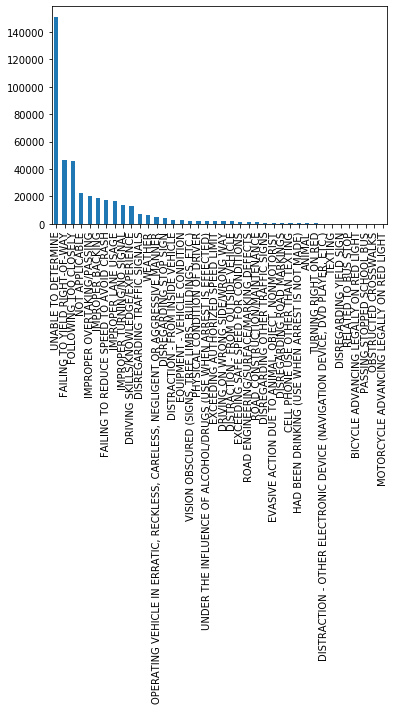

In [21]:
d.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')

In [64]:
columnss = ['PHYSICAL_CONDITION','DAMAGE','REPORT_TYPE','VEHICLE_TYPE',
            'VEHICLE_YEAR','UNIT_NO','NUM_UNITS','DEVICE_CONDITION',
            'CRASH_RECORD_ID','HIT_AND_RUN_I','VEHICLE_USE','DRIVERS_LICENSE_CLASS',
            'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE','DRIVER_VISION',
            'ROADWAY_SURFACE_COND','OCCUPANT_CNT','WEATHER_CONDITION', 'LIGHTING_CONDITION',
            'FIRST_CRASH_TYPE','BAC_RESULT','TRAFFICWAY_TYPE','CRASH_TYPE','LATITUDE','LONGITUDE',
            'PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL','EXCEED_SPEED_LIMIT_I',
            'INJURIES_FATAL','MANEUVER','DRIVER_ACTION','TRAVEL_DIRECTION','CRASH_HOUR',
            'CRASH_DAY_OF_WEEK','CRASH_MONTH', 'STREET','MOST_SEVERE_INJURY',
            'CRASH_YEAR', 'ROAD_DEFECT','ALIGNMENT',
            'AGE','LANE_CNT','INTERSECTION_RELATED_I',"CELL_PHONE_USE","NOT_RIGHT_OF_WAY_I"]

x = d[columnss]

In [65]:
x.shape

(415951, 45)

In [66]:

# x = x[(x.WEATHER_CONDITION != "UNKNOWN")]
# x = x[(x.LIGHTING_CONDITION != "UNKNOWN")]
# x = x[(x.TRAFFICWAY_TYPE != "NOT REPORTED")]
# x = x[(x.TRAFFICWAY_TYPE != "OTHER")]
# x = x[(x.TRAFFICWAY_TYPE != "UNKNOWN")]
# x = x[(x.ROADWAY_SURFACE_COND != "OTHER")]
# x = x[(x.ROADWAY_SURFACE_COND != "UNKNOWN")]
# x = x[(x.DRIVER_VISION != "OTHER")]
# x = x[(x.DRIVER_VISION != "UNKNOWN")]


In [67]:
x.EXCEED_SPEED_LIMIT_I = x.EXCEED_SPEED_LIMIT_I.map(dict(Y=1, N=0))
x.CELL_PHONE_USE = x.CELL_PHONE_USE.map(dict(Y=1, N=0))
x.NOT_RIGHT_OF_WAY_I = x.NOT_RIGHT_OF_WAY_I.map(dict(Y=1, N=0))
x.INTERSECTION_RELATED_I = x.INTERSECTION_RELATED_I.map(dict(Y=1, N=0))

In [68]:
pd.isnull(x).sum()

PHYSICAL_CONDITION           6050
DAMAGE                          0
REPORT_TYPE                  9130
VEHICLE_TYPE                 3679
VEHICLE_YEAR               107020
UNIT_NO                         0
NUM_UNITS                       1
DEVICE_CONDITION                0
CRASH_RECORD_ID                 0
HIT_AND_RUN_I              298284
VEHICLE_USE                  3679
DRIVERS_LICENSE_CLASS      189614
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DRIVER_VISION                6050
ROADWAY_SURFACE_COND            0
OCCUPANT_CNT                 3679
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
BAC_RESULT                   6050
TRAFFICWAY_TYPE                 0
CRASH_TYPE                      0
LATITUDE                     2268
LONGITUDE                    2268
PRIM_CONTRIBUTORY_CAUSE         0
INJURIES_TOTAL                893
EXCEED_SPEED_LIMIT_I       413832
INJURIES_FATAL                893
MANEUVER      

In [69]:
x.dropna(subset=['LONGITUDE'],  inplace = True)
x.dropna(subset=['DRIVER_ACTION'],  inplace = True)
x.dropna(subset=['TRAVEL_DIRECTION'],  inplace = True)
x.dropna(subset=['DRIVERS_LICENSE_CLASS'],  inplace = True)
x.dropna(subset=['DRIVER_VISION'],  inplace = True)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [70]:
x["LANE_CNT"].fillna(x["LANE_CNT"].mode()[0], inplace = True) 
x["AGE"].fillna(x["AGE"].mode()[0], inplace = True)
# x["VEHICLE_YEAR"].fillna(x["VEHICLE_YEAR"].mode()[0], inplace = True)
# x["DRIVER_VISION"].fillna(x["DRIVER_VISION"].mode()[0], inplace = True)
# x["MANEUVER"].fillna(x["MANEUVER"].mode()[0], inplace = True)

x["AGE"].fillna(x["AGE"].mode()[0], inplace = True)
x["INJURIES_TOTAL"].fillna(x["INJURIES_TOTAL"].mode()[0], inplace = True)
x["BAC_RESULT"].fillna(x["BAC_RESULT"].mode()[0], inplace = True)
x["OCCUPANT_CNT"].fillna(x["OCCUPANT_CNT"].mode()[0], inplace = True)
x["INJURIES_FATAL"].fillna(x["INJURIES_FATAL"].mode()[0], inplace = True)
x["MOST_SEVERE_INJURY"].fillna(x["MOST_SEVERE_INJURY"].mode()[0], inplace = True)


In [71]:
#x['AGE'] = x['AGE'].map(lambda x: '<20' if (x < 20) else '<30' if (x >= 20 and x < 30) else '<40'if (x >= 30 and x < 40) else '<50'if (x >= 40 and x < 50) else '<60'if (x >= 50 and x < 60) else '60+')
x['CRASH_HOUR'] = x['CRASH_HOUR'].map(lambda x: 'After midnight' if (x <= 6) else 'Morning' if (x >= 6 and x <= 12) else 'Afternoon' if (x >= 12 and x <= 18) else 'Night')
#x['POSTED_SPEED_LIMIT'] = x['POSTED_SPEED_LIMIT'].map(lambda x: 5 if (x <= 5) else 10 if (x > 5 and x <= 15) 
#                                                       else 20 if (x > 15 and x <= 20) else 30 if (x > 20 and x <= 30) 
#                                                       else 40 if (x > 35 and x <= 40) else 50 if (x > 40 and x <= 50)
#                                                       else 60 if (x > 55 and x <= 60) else 70)


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
pd.isnull(x).sum()


PHYSICAL_CONDITION              0
DAMAGE                          0
REPORT_TYPE                  5433
VEHICLE_TYPE                    0
VEHICLE_YEAR                10926
UNIT_NO                         0
NUM_UNITS                       0
DEVICE_CONDITION                0
CRASH_RECORD_ID                 0
HIT_AND_RUN_I              214022
VEHICLE_USE                     0
DRIVERS_LICENSE_CLASS           0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DRIVER_VISION                   0
ROADWAY_SURFACE_COND            0
OCCUPANT_CNT                    0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
BAC_RESULT                      0
TRAFFICWAY_TYPE                 0
CRASH_TYPE                      0
LATITUDE                        0
LONGITUDE                       0
PRIM_CONTRIBUTORY_CAUSE         0
INJURIES_TOTAL                  0
EXCEED_SPEED_LIMIT_I       221433
INJURIES_FATAL                  0
MANEUVER      

In [73]:
x.columns

Index(['PHYSICAL_CONDITION', 'DAMAGE', 'REPORT_TYPE', 'VEHICLE_TYPE',
       'VEHICLE_YEAR', 'UNIT_NO', 'NUM_UNITS', 'DEVICE_CONDITION',
       'CRASH_RECORD_ID', 'HIT_AND_RUN_I', 'VEHICLE_USE',
       'DRIVERS_LICENSE_CLASS', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DRIVER_VISION', 'ROADWAY_SURFACE_COND', 'OCCUPANT_CNT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'BAC_RESULT', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'LATITUDE', 'LONGITUDE',
       'PRIM_CONTRIBUTORY_CAUSE', 'INJURIES_TOTAL', 'EXCEED_SPEED_LIMIT_I',
       'INJURIES_FATAL', 'MANEUVER', 'DRIVER_ACTION', 'TRAVEL_DIRECTION',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'STREET',
       'MOST_SEVERE_INJURY', 'CRASH_YEAR', 'ROAD_DEFECT', 'ALIGNMENT', 'AGE',
       'LANE_CNT', 'INTERSECTION_RELATED_I', 'CELL_PHONE_USE',
       'NOT_RIGHT_OF_WAY_I'],
      dtype='object')

In [74]:
x['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 63726
FAILING TO YIELD RIGHT-OF-WAY                                                       31696
FOLLOWING TOO CLOSELY                                                               28516
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10880
IMPROPER BACKING                                                                    10458
IMPROPER OVERTAKING/PASSING                                                         10278
IMPROPER LANE USAGE                                                                  9536
IMPROPER TURNING/NO SIGNAL                                                           9078
NOT APPLICABLE                                                                       8716
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  7706
WEATHER                                                                              5144
DISREGARDI

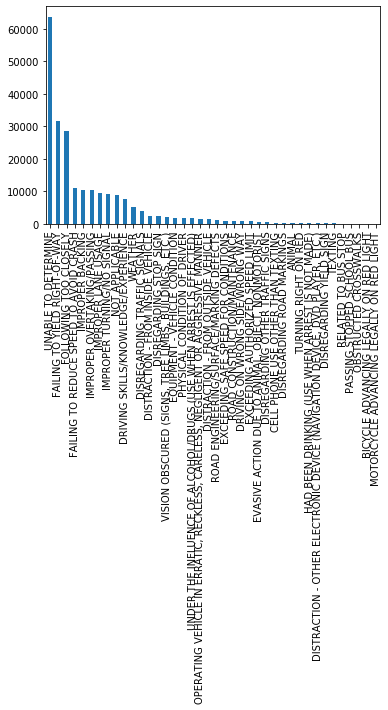

In [75]:
x['PRIM_CONTRIBUTORY_CAUSE'].value_counts().plot(kind='bar')

In [76]:
x.columns

Index(['PHYSICAL_CONDITION', 'DAMAGE', 'REPORT_TYPE', 'VEHICLE_TYPE',
       'VEHICLE_YEAR', 'UNIT_NO', 'NUM_UNITS', 'DEVICE_CONDITION',
       'CRASH_RECORD_ID', 'HIT_AND_RUN_I', 'VEHICLE_USE',
       'DRIVERS_LICENSE_CLASS', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DRIVER_VISION', 'ROADWAY_SURFACE_COND', 'OCCUPANT_CNT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'BAC_RESULT', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'LATITUDE', 'LONGITUDE',
       'PRIM_CONTRIBUTORY_CAUSE', 'INJURIES_TOTAL', 'EXCEED_SPEED_LIMIT_I',
       'INJURIES_FATAL', 'MANEUVER', 'DRIVER_ACTION', 'TRAVEL_DIRECTION',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'STREET',
       'MOST_SEVERE_INJURY', 'CRASH_YEAR', 'ROAD_DEFECT', 'ALIGNMENT', 'AGE',
       'LANE_CNT', 'INTERSECTION_RELATED_I', 'CELL_PHONE_USE',
       'NOT_RIGHT_OF_WAY_I'],
      dtype='object')

In [77]:
x.DEVICE_CONDITION.value_counts()

NO CONTROLS                 120625
FUNCTIONING PROPERLY         86967
UNKNOWN                      10440
OTHER                         1826
FUNCTIONING IMPROPERLY        1445
NOT FUNCTIONING                774
WORN REFLECTIVE MATERIAL       127
MISSING                         35
Name: DEVICE_CONDITION, dtype: int64

In [78]:
x.columns = x.columns.str.strip()

In [79]:
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(r'[^\w\s]+', '')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISTRACTION  OTHER ELECTRONIC DEVICE NAVIGATION DEVICE DVD PLAYER ETC','DISTRACTION  FROM INSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('CELL PHONE USE OTHER THAN TEXTING','DISTRACTION  FROM INSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('TEXTING','DISTRACTION  FROM INSIDE VEHICLE')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT','CYCLE ADVANCING LEGALLY ON RED LIGHT')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('BICYCLE ADVANCING LEGALLY ON RED LIGHT','CYCLE ADVANCING LEGALLY ON RED LIGHT')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('UNDER THE INFLUENCE OF ALCOHOLDRUGS USE WHEN ARREST IS EFFECTED', 'INTOXICATED/PHYSICAL CONDITION')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('PHYSICAL CONDITION OF DRIVER','INTOXICATED/PHYSICAL CONDITION')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('HAD BEEN DRINKING USE WHEN ARREST IS NOT MADE','INTOXICATED/PHYSICAL CONDITION')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('OPERATING VEHICLE IN ERRATIC RECKLESS CARELESS NEGLIGENT OR AGGRESSIVE MANNER','INTOXICATED/PHYSICAL CONDITION')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('ROAD CONSTRUCTIONMAINTENANCE','ROAD CONDITIONS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('ROAD ENGINEERINGSURFACEMARKING DEFECTS','ROAD CONDITIONS')
    
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING OTHER TRAFFIC SIGNS','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING ROAD MARKINGS','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING STOP SIGN','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DRIVING ON WRONG SIDEWRONG WAY','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING YIELD SIGN','DISREGARDING TRAFFIC SIGNALS')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('EVASIVE ACTION DUE TO ANIMAL OBJECT NONMOTORIST','DISTRACTION  FROM OUTSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('ANIMAL','DISTRACTION  FROM OUTSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('OBSTRUCTED CROSSWALKS','DISTRACTION  FROM OUTSIDE VEHICLE')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('PASSING STOPPED SCHOOL BUS','RELATED TO BUS STOP')


x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('EXCEEDING AUTHORIZED SPEED LIMIT','SPEED RELATED')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('FAILING TO REDUCE SPEED TO AVOID CRASH','SPEED RELATED')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('EXCEEDING SAFE SPEED FOR CONDITIONS','SPEED RELATED')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('TURNING RIGHT ON RED','SPEED RELATED')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('VISION OBSCURED SIGNS TREE LIMBS BUILDINGS ETC','DISTRACTION  FROM OUTSIDE VEHICLE')
# x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISTRACTION  FROM OUTSIDE VEHICLE','SOME SORT OF DISTRACTION')
# x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISTRACTION  FROM INSIDE VEHICLE','SOME SORT OF DISTRACTION')


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: Set

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [80]:
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "UNABLE TO DETERMINE")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "NOT APPLICABLE")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "CYCLE ADVANCING LEGALLY ON RED LIGHT")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "RELATED TO BUS STOP")]


In [81]:
x = x[(x.LANE_CNT != '433,634')]

In [82]:
x.shape

(149687, 45)

In [83]:
x.to_csv('dx.csv')

In [ ]:
df.VEHICLE_DEFECT.value_counts()